In [361]:
# define the setting of our problem 

import numpy as np 


""" Define the borders of our problem """
MIN_BORDER = -10
MAX_BORDER  = 10


"""Define the fiteness function """
def fitness(x):
    return np.sin( x )  - .5 * abs( x )



<img src="plotfunctionsin.png"
     alt="sin - abd plot"
     style="float: left; margin-right: 10px;" />


In [362]:
# create our individual that represent a solution 
""" Create our individual class
our individual contains a Gene and the fintness of that gene


"""

class Individual : 
    def __init__(self , geneList , fitnessFunction):
        
        self.geneList = geneList
        self.fitness = fitnessFunction(geneList[0])
    def __str__(self):
        return f"{self.geneList[ 0 ]:.2f}-->{self.fitness:.2f}"
    
    def getGene(self):
        return self.geneList[ 0 ]
    
        


In [363]:

# Individual creation 
import random

def createRandomIndividual():
    return Individual([random.uniform(MIN_BORDER , MAX_BORDER)] , fitness)

def createIndividual(gene):
    return Individual([gene] , fitness)

In [364]:
""" Let's just test the creation of a individual"""

indiv  = createIndividual(1)

print(indiv)

1.00-->0.34


In [365]:
# Population
import matplotlib.pyplot as plt 
""" Just create the Population methods """
def getBestIndividual(population):
    return max(population , key = lambda ind : ind.fitness)

def getAverageFitness(population):
    return sum([ i.fitness for i in population])/ (len(population))

"""
Plotting the population on the fitness curve
"""
def plotPopulation(population):
    # best individual of the population
    
    bestIndividual = getBestIndividual(population)
    # get best individual fitness 
    
    bestFitness = bestIndividual.fitness
    
    # Average fitness of the population
    
    averageFitness  = getAverageFitness(population)
    
    # Plotting fitness curve 
    
    xAxe  = np.linspace(MIN_BORDER , MAX_BORDER)
    
    plt.plot( xAxe , fitness(xAxe) , '--' , color  = 'blue')
    
    # plotting the hole population
    plt.plot(
    
    [ind.getGene() for ind in population],
    [ind.fitness for ind in population],
        'o' , color = 'red'
        
    
    
    )
    
    # Plotting  best individual 
    
    plt.plot(
    [bestIndividual.getGene()] , [bestIndividual.fitness] , 's' , color = 'green'
    )
    
    # Plotting average fitness 
    plt.plot(
    [MIN_BORDER , MAX_BORDER],
    [averageFitness , averageFitness],
    color = 'gray'
        
    )

    plt.title(f"Best Individial : {bestIndividual} ,  Best Fitness : {bestFitness:.2f} \n"
               f"Average Population Fitness :{averageFitness :.2f}")
              
    plt.show()




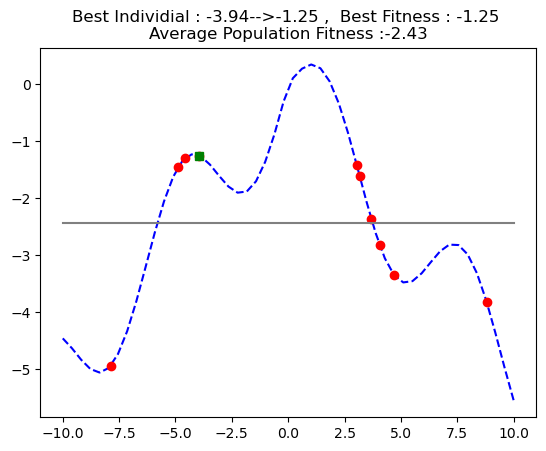

In [366]:
# Initilize Population 

"""
Parameter of the Population

"""

PopulationSize  = 10
random.seed(14)

# Generate random population
polulation  = [createRandomIndividual() for  _ in range(PopulationSize)]

# plotting the distribution of the population on fitness curve

plotPopulation(polulation)


In [367]:
# Selection 
# Tournament selection method 

def selectTournament( population , tournamentSize ):
    newOffSpring = []
    for _ in range(len(population)):
        
        candidates  = [random.choice(population) for _ in range(tournamentSize)]
        newOffSpring.append(max(candidates , key = lambda ind : ind.fitness))
    
    return newOffSpring

"""
Let's applying this function and test it 

"""
random.seed(22)
# parameter the size of the population 
populationSize = 10

# Generate random population 

generation1 = [createRandomIndividual() for _ in range(populationSize)]

# Population after applying selection

generation2 = selectTournament(generation1 , 3)

# Printing results 

print("Generation  1 ")

[print(ind) for ind in generation1]

print("Generation  2 ")

[print(ind) for ind in generation2];




Generation  1 
9.16-->-4.32
-7.19-->-4.39
-9.53-->-4.66
9.97-->-5.51
-6.31-->-3.19
-7.59-->-4.76
3.03-->-1.40
-3.09-->-1.60
7.79-->-2.90
-5.37-->-1.89
Generation  2 
-5.37-->-1.89
3.03-->-1.40
-5.37-->-1.89
-5.37-->-1.89
3.03-->-1.40
-5.37-->-1.89
-5.37-->-1.89
-5.37-->-1.89
3.03-->-1.40
7.79-->-2.90


In [368]:
# crossOver 


<img src="genetic_algorithm.png"
     alt="genetic_algo"
     style="float: left; margin-right: 10px;" />

In [369]:
# CrossOver Implementation 

def geneConstraints(gene , min_  = MIN_BORDER , max_ = MAX_BORDER):
    """ Limit the gene value inside the interval of min_ and max_"""
    if max_ and gene > max_ :
        gene = max_ 
    if min_ and gene < min_ :
        gene = min_
        
    return gene

# define the crossover blend (it's a type of crossing) [ how to crossOver the individuals]


def crossBlend(gene1 , gene2 , alpha  = 0.9 ):
    shift = (1. + 2. * alpha) * random.random()  - alpha
    newGene1  = (1. - shift) * gene1 + shift * gene2
    newGene2  = shift * gene1 + (1. - shift) * gene2
    return geneConstraints(newGene1) , geneConstraints(newGene2)
    

# define the crossOver function

def crossOver( individual1 , individual2 ):
    """
    INdividual crossOver
    
    """
    
    offSpringGenes  = crossBlend(individual1.getGene() ,individual2.getGene())
    
    return [createIndividual(offSpringGenes[0]) , createIndividual(offSpringGenes[1]) ]
    


    
    
    

In [370]:
# Test CrossOver in Random Indivduals

random.seed(50)
# pair of random individual 
individualNumberOne = createRandomIndividual()

individualNumberTwo = createRandomIndividual()

# OffSpring of individuals

offSpring  = crossOver(individualNumberOne , individualNumberTwo)
  
childNumber1  = offSpring[ 0 ]
childNumber2 =  offSpring[ 1 ]
print(childNumber1.getGene() , childNumber2.getGene())  

-4.143239972764364 -0.5825541906127778


[-4.143239972764364, -0.5825541906127778]


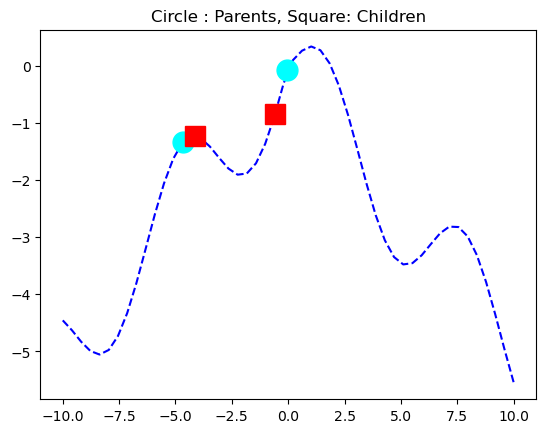

In [371]:
# Visulasation of the result 

xAxe = np.linspace( MIN_BORDER , MAX_BORDER )
plt.plot( xAxe , fitness(xAxe) , '--' , color = "blue")
plt.plot(
  [individualNumberOne.getGene() , individualNumberTwo.getGene()],
  [individualNumberOne.fitness , individualNumberTwo.fitness],
  'o' , markersize = 15 , color = "aqua"
    
    
)

print([childNumber1.getGene() , childNumber2.getGene()])
plt.plot(
  [childNumber1.getGene() , childNumber2.getGene()],
  [childNumber1.fitness , childNumber2.fitness],
  's' , markersize = 15 , color = "red"
    
    
)

plt.title("Circle : Parents, Square: Children")
plt.show()

In [421]:
# Mutation 
# Mutation Implementation with a little diviation of mean  = 0 and std = 1
def geneConstraints(gene , min_  = MIN_BORDER , max_ = MAX_BORDER):
    """ Limit the gene value inside the interval of min_ and max_"""
    if max_ and gene > max_ :
        gene = max_ 
    if min_ and gene < min_ :
        gene = min_
        
    return gene

def mutateGaussian( gene  , mean  , std ) :
    """
    Gaussian Mutation
    
    """
    mutatedGene  = gene  + random.gauss( mean  , std )
    
    return geneConstraints(mutatedGene)


"""
Individual mutation
"""

def mutate( individual ) :
    return createIndividual( mutateGaussian( individual.getGene() , 0 , 1 )  )

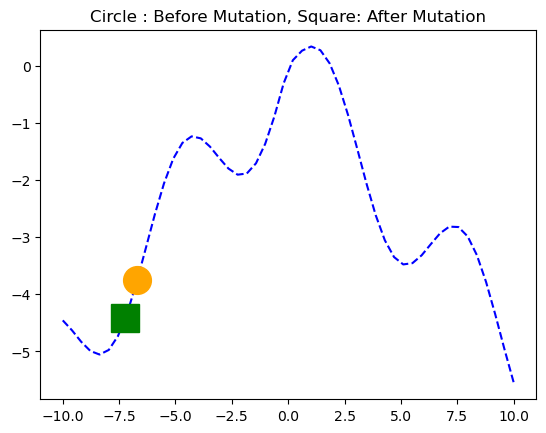

In [422]:
# Let's test mutation  for a random individual 
random.seed(21)
# Random individual 

individual = createRandomIndividual()

# Mutated individual 
mutated  = mutate( individual )

# Visulization
x = np.linspace(MIN_BORDER, MAX_BORDER)
plt.plot(x, fitness(x), '--', color = 'blue')
plt.plot(
[individual.getGene()],
[individual.fitness],
'o', markersize = 20, color = 'orange'
)

plt.plot(
[mutated.getGene()],
[mutated.fitness],
's', markersize = 20, color = 'green'
)
plt.title("Circle : Before Mutation, Square: After Mutation")
plt.show()


In [423]:
# Summery 




<img src="flowgeneticalgorithms.jpg"
     alt="genetic_algo_flow"
     style="float: left; margin-right: 10px;" />


### When should I stop a genetic algorithm



1-Finding an acceptable solution </br>
2-Reaching a certain number of generations </br>
3-Decrease in qualitative improvements in the population </br>

In [424]:
"""
Genetic algorithm has special parameters

CrossOver Probability : The probability of crossing 
Mutation Probability :  The probability of mutation

"""



'\nGenetic algorithm has special parameters\n\nCrossOver Probability : The probability of crossing \nMutation Probability :  The probability of mutation\n\n'

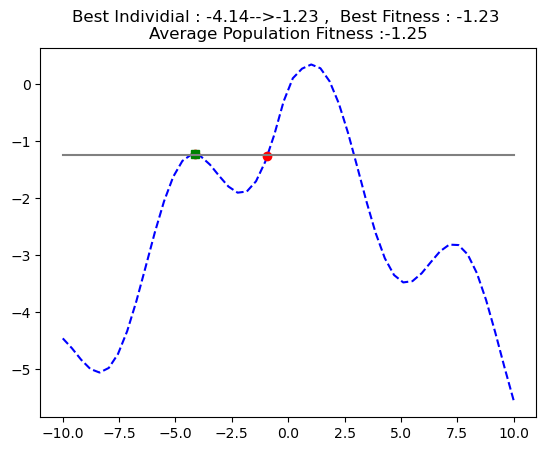

In [425]:
# Parameters 
POPULATIONSIZE = 10
CROSSOVERPROBABILITY= .9
MUTATIONPROBABILITY  = .9
MAXGENERATIONS  = 10

random.seed(10)
# initialize random population 
population = [ createRandomIndividual() for _ in range(POPULATIONSIZE)]

# selection operation

for generationNumber in range(POPULATIONSIZE):
    selected = selectTournament(population , 3)
    

# CrossOver 
crossedOffSpring = []
for individual1 , individual2 in zip(selected[::2] , selected[1::2]):
    if random.random() <= CROSSOVERPROBABILITY :
        # applying crossObver for both individuals
        children = crossOver(individual1 , individual2)
        crossedOffSpring.append(children[0])
        crossedOffSpring.append(children[1])
    else:
        # passing individuals without crossOver 
        crossedOffSpring.append(individual1)
        crossedOffSpring.append(individual2)
        
        
# Mutation
mutated = []
for individual in offSpring : 
    if random.random() <= MUTATIONPROBABILITY:
        # applying mutation
        mutated.append(mutate(individual))
    else: 
        # passing without mutation
        mutated.append(individual)
# Next generation

population = mutated

# visulatation
plotPopulation(population)
